Let $f(x)=e^{-1.3x}$. We apply finite difference formulas of first, second, and fourth order to estimate $f'(0)=-1.3$.

In [1]:
using LinearAlgebra   # for dot products
h = @. 1/10^(1:12)
f = x -> exp(-1.3*x);
fd1 = zeros(size(h))
fd2 = zeros(size(h))
fd4 = zeros(size(h))
for (j,h) = enumerate(h) 
    nodes = h*(-2:2)
    vals = @. f(nodes)/h
    fd1[j] = dot([   0    0 -1    1     0],vals)
    fd2[j] = dot([   0 -1/2  0  1/2     0],vals)
    fd4[j] = dot([1/12 -2/3  0  2/3 -1/12],vals)
end

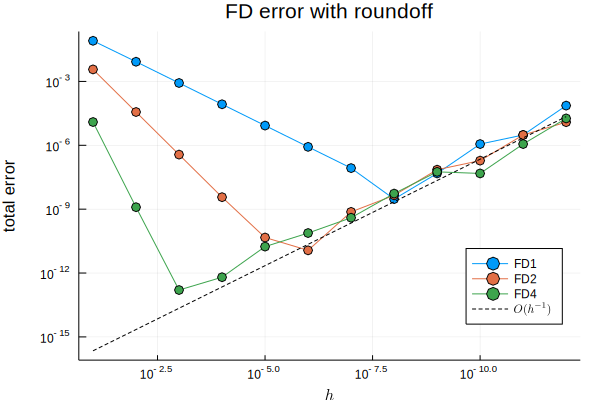

In [2]:
using Plots
plot(h,abs.(fd1.+1.3),m=:o,label="FD1",
    xaxis=(:log10,"\$h\$"),xflip=true,yaxis=(:log10,"total error"),
    title="FD error with roundoff",legend=:bottomright)
plot!(h,abs.(fd2.+1.3),m=:o,label="FD2")
plot!(h,abs.(fd4.+1.3),m=:o,label="FD4")
plot!(h,0.1*eps()./h,l=:dash,color=:black,label="\$O(h^{-1})\$")

Again the graph is made so that $h$ decreases from left to right. The errors are dominated at first by truncation error, which decreases most rapidly for the 4th order formula. However, increasing roundoff error eventually equals and then dominates the truncation error as $h$ continues to decrease. As the order of accuracy increases, the crossover point moves to the left (greater efficiency) and down (greater accuracy). 